In [69]:
from model import Model
from dmchunk import Chunk
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# read data to get experiment intervals
dat = pd.read_csv("dataJS.csv")
sorted_discrete_ts = sorted(dat.Ts.unique())
print(len(sorted_discrete_ts))
short_ts = sorted_discrete_ts[:11]
print((short_ts))
med_ts = sorted_discrete_ts[5:16]
print((med_ts))
long_ts = sorted_discrete_ts[-11:]
print((long_ts))

21
[494.09, 529.38, 564.67, 599.96, 635.26, 670.55, 705.84, 741.13, 776.42, 811.72, 847.01]
[670.55, 705.84, 741.13, 776.42, 811.72, 847.01, 882.3, 917.59, 952.88, 988.18, 1023.5]
[847.01, 882.3, 917.59, 952.88, 988.18, 1023.5, 1058.8, 1094.1, 1129.3, 1164.6, 1199.9]


In [55]:
# helper to add noise 
def noise(s):
    rand = random.uniform(0.001,0.999)
    return s * math.log((1 - rand)/rand)

# transition from time to pulses (storing)
def time_to_pulses(time, t_0 = 0.011, a = 1.1, b = 0.015, add_noise = True):
    pulses = 0
    pulse_duration = t_0
    while time >= pulse_duration:
        time = time - pulse_duration
        pulses = pulses + 1
        pulse_duration = a * pulse_duration + add_noise * noise(b * a * pulse_duration)
    return pulses

# transition from pulses to time (reproduction)
def pulses_to_time(pulses, t_0 = 0.011, a = 1.1, b = 0.015, add_noise = True):
    time = 0
    pulse_duration = t_0
    while pulses > 0:
        time = time + pulse_duration
        pulses = pulses - 1
        pulse_duration = a * pulse_duration + add_noise * noise(b * a * pulse_duration)
    return time

In [72]:
# return sampled time from the given discrete intervals
def sample_time(dur_times):
    t = random.randrange(len(dur_times)-1)
    return dur_times[t]

In [85]:
def experiment_trial(modelerino, ts, trial):
    # transform to pulses with added noise
    tm_pulses = time_to_pulses(ts)
    # store perceived pulses
    chunk = Chunk(name="memory"+trial, slots={"perceived_pulses": tm_pulses})
    modelerino.add_encounter(chunk)
    modelerino.time += 1600  # milliseconds!
    # retrieve
    # blending retieval!
    tp = pulses_to_time(tm_pulses)
    # keep reproduced time / return value
    return tp

In [86]:
def experiment(dur_times):
    num_subjects = 1  # number of test subjects
    num_trials = 100  # number of trials
    all_ts = []  # all the presented times
    all_tp = []  # all the reproduced times
    # go over all subjects
    for subject in range(num_subjects):
        modelerino = Model()  # initialize model for each subject
        # complete the number of trials for each
        for trial in range(num_trials):
            # uniformly random shown time
            ts = sample_time(dur_times)
            # reproduced time
            tp = experiment_trial(modelerino, ts, trial)
            # store the values
            all_ts.append(ts)
            all_tp.append(tp)
        print(all_ts)
        print(all_tp)
    plt.plot(all_ts, all_tp, 'bo')

[635.26, 741.13, 741.13, 776.42, 670.55, 811.72, 564.67, 599.96, 564.67, 670.55, 705.84, 494.09, 494.09, 635.26, 670.55, 741.13, 776.42, 776.42, 599.96, 635.26, 564.67, 635.26, 811.72, 776.42, 564.67, 811.72, 776.42, 494.09, 776.42, 564.67, 564.67, 564.67, 776.42, 599.96, 741.13, 776.42, 635.26, 670.55, 741.13, 776.42, 741.13, 529.38, 564.67, 705.84, 529.38, 705.84, 705.84, 705.84, 494.09, 811.72, 564.67, 494.09, 811.72, 494.09, 811.72, 741.13, 599.96, 811.72, 635.26, 811.72, 705.84, 494.09, 529.38, 670.55, 741.13, 529.38, 776.42, 705.84, 635.26, 811.72, 564.67, 529.38, 529.38, 635.26, 670.55, 564.67, 705.84, 564.67, 741.13, 564.67, 494.09, 741.13, 599.96, 635.26, 635.26, 705.84, 529.38, 705.84, 635.26, 494.09, 635.26, 635.26, 811.72, 564.67, 776.42, 741.13, 635.26, 776.42, 705.84, 635.26]
[1279.0320637481661, 614.3459636072608, 927.3396156165342, 653.4642921401319, 732.8971730041529, 786.0826130191375, 315.7288814352819, 330.52983155677134, 604.8345615389001, 407.859664334029, 952.673

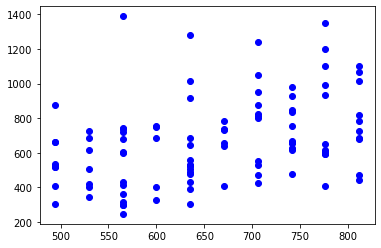

In [88]:
experiment(short_ts)